In [1]:
from src.preprocessing import *
from src.metrics import *
from src.visualisation import *
from src.NetworkGraphs import *

import networkx as nx
from IPython.display import display

In [ ]:
Crypto_networkGraphs = NetworkGraphs('../datasets/Dune_Eth_transaction.csv', type="CRYPTO")

In [2]:
networkGraphs = NetworkGraphs('../datasets/Railway.csv', type="RAILWAY", spatial =True)

Excluded 0 stations


# Graph Statistics

In [7]:
global_metrics = compute_global_metrics(networkGraphs)
global_metrics

,Metrics,Directed,Undirected
0,Clustering Coefficient,0.377180,0.422829
1,Avg. Shortest Path Length,0.000000,8.786388
2,Diameter,0.000000,47.000000
3,Radius,0.000000,24.000000
4,Number of Nodes,2719.000000,2719.000000
5,Number of Edges,10772.000000,6169.000000
6,Density,0.001458,0.001669
7,Transitivity,0.292370,0.321659
8,Avg. Degree,7.923501,4.537698
9,Avg. Clustering,0.377180,0.422829


In [4]:
directed_node_metrics = compute_node_metrics(networkGraphs, directed=True)
directed_node_metrics


,Node,Degree Centrality,Eigenvector Centrality,Closeness Centrality,Betweeness Centrality,Load Centrality
0,692,0.008094,1.616408e-02,0.146138,0.025283,0.025286
1,1351,0.005519,4.362783e-03,0.136173,0.015457,0.014929
2,698,0.002208,6.243377e-04,0.119821,0.000544,0.000544
3,944,0.003679,2.016231e-03,0.127892,0.000967,0.001422
4,232,0.005151,6.074115e-04,0.120029,0.007658,0.007663
...,...,...,...,...,...,...
2714,2768,0.001472,1.452406e-07,0.086094,0.002926,0.002926
2715,2679,0.001472,1.305561e-08,0.079258,0.002195,0.002195
2716,2657,0.001472,1.173596e-09,0.073423,0.001464,0.001464
2717,2682,0.001472,1.054935e-10,0.068386,0.000732,0.000732


In [11]:
undirected_node_metrics = compute_node_metrics(networkGraphs, directed=False)
undirected_node_metrics

,Node,Degree Centrality,Eigenvector Centrality,Closeness Centrality,Betweeness Centrality,Load Centrality
0,692,0.004415,8.691994e-03,0.155181,0.022524,0.022717
1,1351,0.003679,2.191421e-03,0.143794,0.016451,0.016309
2,698,0.001104,2.526278e-04,0.125740,0.000000,0.000000
3,944,0.002208,8.887600e-04,0.134828,0.001943,0.002157
4,232,0.002943,2.502948e-04,0.125985,0.007017,0.006974
...,...,...,...,...,...,...
2714,2768,0.000736,3.253368e-08,0.090018,0.002940,0.002940
2715,2679,0.000736,2.481324e-09,0.082601,0.002206,0.002206
2716,2657,0.000736,1.892588e-10,0.076310,0.001471,0.001471
2717,2682,0.000736,1.443574e-11,0.070905,0.000736,0.000736


# VISUALISATION

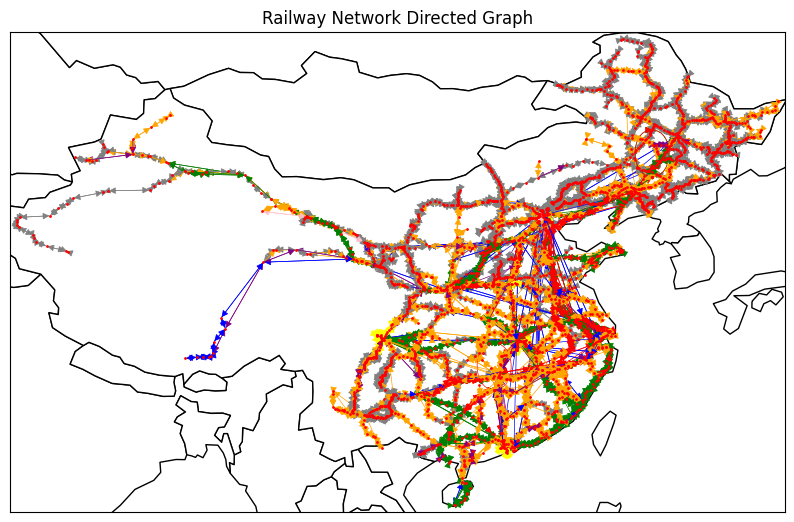

In [4]:
plt_directed = static_visualisation(networkGraphs, 'Railway Network Directed Graph', directed=True)
plt_directed.show()

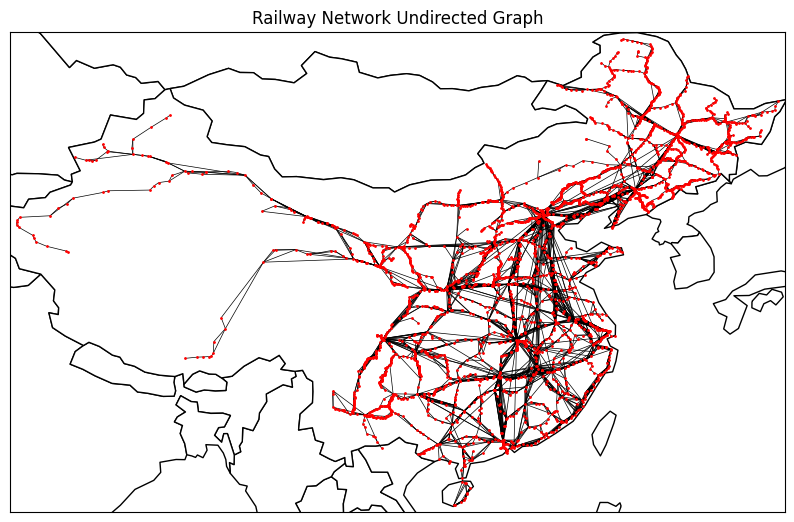

In [5]:
plt_undirected = static_visualisation(networkGraphs, 'Railway Network Undirected Graph', directed=False)
plt_undirected.show()

In [1]:
# plot_metrics_on_map(networkGraphs, directed_node_metrics, 'Metrics on the Map', directed=False).show()

# Spatial and Temporal Analysis

### Create frames of the graph
May take very long to create all of the frame images for 2 Days, one frame is created every 5 minute. You may change the range to create less frames and a shorter video.

In [13]:
%matplotlib Notebook
temporal_graphs = create_temporal_subgraph(networkGraphs)
slider, plt = plot_temporal_graphs(temporal_graphs)
display(slider)
plt.show()

99.97%

<IPython.core.display.Javascript object>

IntSlider(value=0, description='Timeframe', max=2879)

In [ ]:
temporal_graphs = create_temporal_subgraph(networkGraphs,0, (3*24+12)*60, 10)

In [ ]:
%matplotlib notebook
slider, plt = plot_temporal_graphs(temporal_graphs)

### Create a video of the graph with cv2 (OpenCV)

In [ ]:
# import cv2
# import os
#
# # Path to the folder containing the image frames
# frames_folder = 'frames/'
#
# # Get the list of frame filenames in the folder
# frame_filenames = os.listdir(frames_folder)
#
# # Sort the filenames in ascending order
# frame_filenames.sort(key=lambda x: int(x[:-4]))
#
# # Read the first frame to get its dimensions
# frame = cv2.imread(frames_folder + frame_filenames[0])
# height, width, layers = frame.shape
#
# # Create a VideoWriter object to write the video
# fourcc = cv2.VideoWriter_fourcc(*'mp4v')
# video = cv2.VideoWriter('output.mp4', fourcc, 30, (width, height))
#
# # Loop through the frames and add them to the video
# i=0
# for filename in frame_filenames:
#     frame = cv2.imread(frames_folder + filename)
#     video.write(frame)
#     print(f"\r{i/2764*100:.2f}%", end="")
#     i+=1
#
# # Release the VideoWriter object and display a message
# video.release()
# print('\nVideo saved as output.mp4')

# SHORTEST PATH ANALYSIS

In [ ]:
get_shortest_path(networkGraphs, source=1136, target=1095, directed=False)